In [2]:
import tensorflow as tf

#Create a variable
w=tf.Variable([[0.5,1.0]])

x=tf.Variable([[2.0],[1.0]])

y=tf.matmul(w,x)

#variables have to be explicitly initialized before you can run Ops
init_op =tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print (y.eval())







[[2.]]


In [12]:
import tensorflow as tf

#float32
a=tf.zeros([3,4])


#参考
#tensor is [[1,2,3],[4,5,6]]
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
b=tf.zeros_like(tensor) 
#tf.ones_like([2,3],int32) = =>[[1,1,1],[1,1,1]]

#tensor is [[1,2,3],[4,5,6]]
#tf.ones_like(tensor) = =>[[1,1,1],[1,1,1]]

#constant 1-D tensor popular with value list
#tensor = tf.constant([1,2,3,4,5,6,7])=>[1,2,3,4,5,6,7]

#constant 1-D tensor popular with scalar value -1
#tensor = tf.constant(-1.0,shape=[2,3]) =>[[-1,-1,-1]
#                                         [-1,-1,-1]]


#tf.linspace(10.0,12.0,3,name="linespace") =>[10.0,11.0,12.0]


with tf.Session() as sess:
    print(sess.run(b))




[[0 0 0]
 [0 0 0]]


In [14]:
norm = tf.random_normal([2,3],mean=-1,stddev=4)

#shuffle the fiest dimension of a tensor
c = tf.constant([[1,2],[3,4],[5,6]])
shuff=tf.random_shuffle(c)

#Each time we run these ops, different results are generated
sess = tf.Session()
print(sess.run(norm))
print(sess.run(shuff))





[[ 4.1303053  -8.72081    -2.1329763 ]
 [-2.8291407  -0.38938498  3.856248  ]]
[[1 2]
 [3 4]
 [5 6]]


In [17]:
state =tf.Variable(0)
new_value = tf.add(state,tf.constant(1))
update =- tf.assign(state,new_value)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))
        
    




0
1
2
3


In [18]:
import numpy as np

a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)

with tf.Session() as sess:
    print(sess.run(ta))







[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [36]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.matmul(input1,input2)
with tf.Session() as sess:
    print(sess.run([output],feed_dict={input1:[[7.]],input2:[[2.]]}))





[array([[14.]], dtype=float32)]


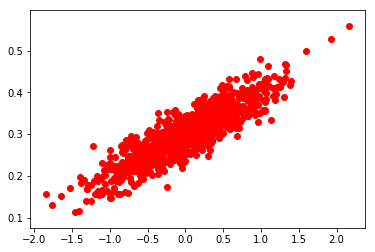

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#随机生成1000个点围绕在y=0.1x+0.3直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1=np.random.normal(0.0,0.56)
    y1=x1*0.1+0.3+np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])
    
#生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


plt.scatter(x_data,y_data,c='r')
plt.show()






import tensorflow as tf

#生成一堆的w矩阵，取值是[-1,1]之间的随机数
w = tf.Variable(tf.random_uniform([1],-1.0,1.0),name = 'w')
#生成一维的b矩阵初始值为0
b = tf.Variable(tf.zeros([1]),name = 'b')
#经过计算得出预估值y
y = w * x_data + b

#以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y -y_data),name='loss')
#采用梯度下降法来优化参数
optimizer=tf.train.GradientDescentOptimizer(0.5)


#训练的过程就是最小化这个误差值
train = optimizer.minimize(loss,name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

#初始化的w和b是多少
print ("w =",sess.run(w),"b =",sess.run(b),"loss =",sess.run(loss))
#执行20次训练
for step in range(20):
    sess.run(train)
    #输出训练好的w和b
    print ("w =",sess.run(w),"b =",sess.run(b),"loss =",sess.run(loss))
writer = tf.train.SummaryWriter("./tmp",sess.graph)    



















In [13]:
import tensorflow as tf

#生成一堆的w矩阵，取值是[-1,1]之间的随机数 
w = tf.Variable(tf.random_uniform([1],-1.0,1.0),name = 'w')

#生成一维的b矩阵初始值为0 
b = tf.Variable(tf.zeros([1]),name = 'b')

#经过计算得出预估值y 
y = w * x_data + b

#以预估值y和实际值y_data之间的均方误差作为损失 
loss = tf.reduce_mean(tf.square(y -y_data),name='loss')

#采用梯度下降法来优化参数 
optimizer=tf.train.GradientDescentOptimizer(0.5)

#训练的过程就是最小化这个误差值 
train = optimizer.minimize(loss,name='train')

sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init)

#初始化的w和b是多少 
print ("w =",sess.run(w),"b =",sess.run(b),"loss =",sess.run(loss))

#执行20次训练 
for step in range(20): 
    sess.run(train)

#输出训练好的w和b
    print ("w =",sess.run(w),"b =",sess.run(b),"loss =",sess.run(loss))
#writer = tf.train.SummaryWriter("./tmp",sess.graph)

w = [-0.41767144] b = [0.] loss = 0.18166919
w = [-0.2464315] b = [0.3078831] loss = 0.039285332
w = [-0.13512307] b = [0.3053117] loss = 0.018492667
w = [-0.0597273] b = [0.3036403] loss = 0.008953071
w = [-0.00865832] b = [0.30250818] loss = 0.004576342
w = [0.02593298] b = [0.30174133] loss = 0.002568314
w = [0.04936324] b = [0.3012219] loss = 0.0016470375
w = [0.06523361] b = [0.3008701] loss = 0.001224359
w = [0.07598332] b = [0.3006318] loss = 0.001030436
w = [0.0832646] b = [0.30047035] loss = 0.00094146456
w = [0.08819653] b = [0.30036104] loss = 0.00090064487
w = [0.09153715] b = [0.30028698] loss = 0.0008819171
w = [0.0937999] b = [0.30023682] loss = 0.0008733244
w = [0.09533256] b = [0.30020285] loss = 0.0008693825
w = [0.0963707] b = [0.3001798] loss = 0.00086757395
w = [0.09707388] b = [0.30016422] loss = 0.0008667439
w = [0.09755018] b = [0.30015367] loss = 0.0008663633
w = [0.0978728] b = [0.30014652] loss = 0.0008661888
w = [0.09809133] b = [0.30014166] loss = 0.0008661

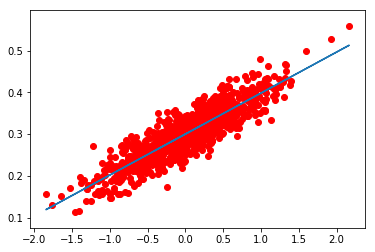

In [14]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(w)*x_data+sess.run(b))
plt.show()